In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

/home/henning/anaconda3/envs/base_mldl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/henning/anaconda3/envs/base_mldl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/henning/anaconda3/envs/base_mldl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/henning/anaconda3/envs/base_

# Simple CNN for Edgelovers

## a) Generation of data

In [2]:
def generate_data(xlen, ylen, n):
    data = np.zeros(shape=(n, xlen, ylen, 1), dtype=np.uint8)
    labels = np.zeros(shape=(n), dtype=np.int).squeeze()
    
    for i in range(n):
        img = np.zeros(shape=(xlen, ylen, 1), dtype=np.uint8)
        
        v_or_h = np.random.randint(0, 2)
        lines = 1
        
        if v_or_h: # horizontal
            label = 0.0
            for _ in range(lines):
                y = np.random.randint(2, ylen - 2)
                x1 = np.random.randint(2, xlen - 10)
                x2 = x1 + 10
                img[y, x1:x2] = 255.0
        else:  # vertical
            label = 1.0
            for _ in range(lines):
                x = np.random.randint(2, xlen - 2)
                y1 = np.random.randint(2, ylen - 10)
                y2 = y1 + 10
                img[y1:y2, x] = 255.0
        
        data[i] = img.copy()
        labels[i] = label
    return data, labels.squeeze()

In [3]:
x0, y0 = generate_data(50, 50, 10000)
x2, y2 = generate_data(50, 50, 10000);

1


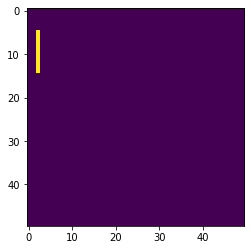

In [4]:
img = x0[0, :, :, 0]
plt.imshow(img)
print(y0[0])

## b) Build the simplest possible CNN

In [5]:
model = Sequential()
model.add(Conv2D(6, kernel_size=5, strides=2, activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 726)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 727       
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x0, y0, batch_size=128, epochs=25, validation_data=(x2, y2));

Train on 10000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
10000/10000 [==============================] - 2s 157us/sample - loss: 1.8154 - acc: 0.6252 - val_loss: 0.6727 - val_acc: 0.7652
Epoch 2/25
10000/10000 [==============================] - 1s 141us/sample - loss: 0.3029 - acc: 0.8844 - val_loss: 0.1047 - val_acc: 0.9536
Epoch 3/25
10000/10000 [==============================] - 1s 139us/sample - loss: 0.0606 - acc: 0.9738 - val_loss: 0.0444 - val_acc: 0.9781
Epoch 4/25
10000/10000 [==============================] - 1s 137us/sample - loss: 0.0354 - acc: 0.9800 - val_loss: 0.0321 - val_acc: 0.9832
Epoch 5/25
10000/10000 [==============================] - 1s 141us/sample - loss: 0.0276 - acc: 0.9843 - val_loss: 0.0264 - val_acc: 0.9870
Epoch 6/25
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0235 - acc: 0.9867 - val_loss: 0.0229 - val_acc: 0.9873
Epoch 7/25
10000/10000 [==============================] - 1s 1

In [14]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.015048485214897664
Accuracy train set: 0.9889000058174133

Loss validation set: 0.014723856045369757
Accuracy validation set: 0.9900000095367432



## c) Visualize the learned kernel

[[ 75 123 104 171   3]
 [ 45  81  19 255  27]
 [ 14  75  81 165   0]
 [ 11  91  98 187 145]
 [179  60  91  74 204]]


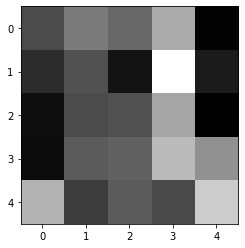

In [21]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

f = filters[:, :, 0, 0]
f -= np.min(f)
f = f * (255 / np.max(f))
f = np.asarray(f, dtype=np.uint8)
print(f)

plt.imshow(f, cmap='gray');

[[ 56  27 254 171 242]
 [108 211 234   0 185]
 [156  85 214  73 210]
 [199 122  48 190 187]
 [222  80  62  75 201]]


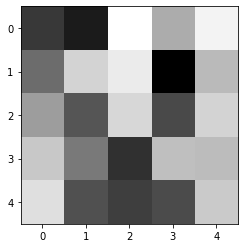

In [9]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

f = filters[:, :, 0, 1]
f -= np.min(f)
f = f * (255 / np.max(f))
f = np.asarray(f, dtype=np.uint8)
print(f)

plt.imshow(f, cmap='gray');

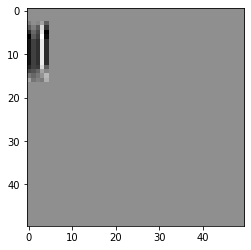

In [22]:
from scipy import signal

conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()
f = filters[:, :, 0, 0]
index = np.where(y0 == 1)[0][0]
img = x0[index, :, :, 0]
grad = signal.convolve2d(img, f, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')

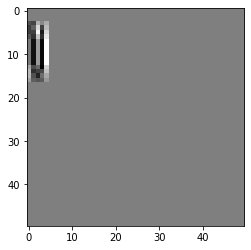

In [23]:
from scipy import signal

conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()
f = filters[:, :, 0, 1]
index = np.where(y0 == 1)[0][0]
img = x0[index, :, :, 0]
grad = signal.convolve2d(img, f, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')

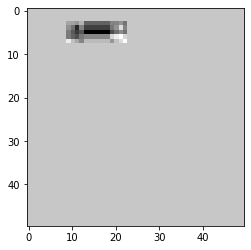

In [24]:
from scipy import signal

conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()
f = filters[:, :, 0, 0]
index = np.where(y0 == 0)[0][0]
img = x0[index, :, :, 0]
grad = signal.convolve2d(img, f, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')

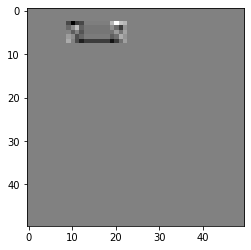

In [25]:
from scipy import signal

conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()
f = filters[:, :, 0, 1]
index = np.where(y0 == 0)[0][0]
img = x0[index, :, :, 0]
grad = signal.convolve2d(img, f, boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')